# Capstone Week 1
---

## Capstone Objectives
- Assist sales and marketing by improving their targeting, and allowing them to correctly assign coverage channels
- Predict sales for 2020 using the data for 2018 and 2019
    - Determine the optimal number of models that need to be built
    - Develop several regression analyses and show the lift that will be achieved through your models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

pd.set_option('display.max_columns', 50)

## Remember the data science workflow
<img src="../data_science_workflow.png" width="400px">

# Read in Data

In [2]:
pwd

'/Users/thomas/Documents/GitHub/Columbia-Capstone/Notebooks'

In [3]:
ls ../

Data Dictionary.xlsx            Notebooks/
Firm Information.xlsx           README.md
LICENSE                         Transaction_Data_20210128.xlsx
Lift Chart Template.xlsx


In [4]:
df = pd.read_excel(
    '../Transaction_Data_20210128.xlsx', 
    sheet_name='36 Rolling Months',
    usecols='B:AN',
    header=1,
    skiprows=0
)

In [5]:
df.to_csv('../Transactions.csv')

In [6]:
firms = pd.read_excel(
    "../Firm Information.xlsx", 
    sheet_name='Rep summary', 
    header=0
)

In [7]:
firms.to_csv('../Firms.csv')

In [8]:
df.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date
0,85102111664960504040,3096,6592,302,157,8,13,7,7,2,3,2,2,9,2,1.909702e+07,399995.834888,1.259993e+07,-231714.43334,-6.557185e+06,0,-0.012133,9.386941e+06,9.743856e+06,-9655.913728,0.0,-24116.993988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.431248e+06,1.066578e+07,0.0,0.0,2017-12-31
1,4492101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.468574e+04,0.000000,0.000000e+00,0.00000,0.000000e+00,0,0.000000,-7.102100e+03,0.000000e+00,-7583.640000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.468574e+04,0.000000e+00,0.0,0.0,2017-12-31
2,85102140943881291064,0,1,0,0,0,1,0,0,0,1,0,0,0,0,-7.164047e+04,0.000000,0.000000e+00,0.00000,-1.950000e+02,0,0.000000,-7.164047e+04,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.164047e+04,0.000000e+00,0.0,0.0,2017-12-31
3,85202121774856516280,1,0,0,0,1,0,0,0,1,0,0,0,2,2,3.425462e+05,0.000000,1.164760e+03,0.00000,0.000000e+00,1,0.000000,0.000000e+00,7.030151e+04,272244.700000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.425462e+05,0.000000e+00,0.0,0.0,2017-12-31
4,0360380,7,0,0,0,1,0,0,0,1,0,0,0,2,0,-2.262721e+05,0.000000,3.278145e+03,0.00000,0.000000e+00,0,0.000000,-1.113566e+05,-2.018566e+04,0.000000,0.0,-94729.890000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.315423e+05,-9.472989e+04,0.0,0.0,2017-12-31


In [9]:
firms.head()

,Contact ID,CustomerID,Firm ID,Office ID,Channel,Sub channel,Firm name
0,0000286,1,1948520,17993101120,National Broker-Dealer,NACS,Morgan Stanley Wealth Management
1,0000422,2,1688552,85202111664692445495,National Broker-Dealer,NACS,"UBS Financial Services, Inc."
2,0000508,3,1567450,15674503441,National Broker-Dealer,NACS,Merrill Lynch
3,0000604,4,0022885,85102132106001250782,Independent Dealer,IBD,LPL Financial LLC
4,0000657,5,1567450,15674501882,National Broker-Dealer,NACS,Merrill Lynch


# Look at the data types

In [10]:
df.dtypes

CONTACT_ID                                     object
no_of_sales_12M_1                               int64
no_of_Redemption_12M_1                          int64
no_of_sales_12M_10K                             int64
no_of_Redemption_12M_10K                        int64
no_of_funds_sold_12M_1                          int64
no_of_funds_redeemed_12M_1                      int64
no_of_fund_sales_12M_10K                        int64
no_of_funds_Redemption_12M_10K                  int64
no_of_assetclass_sold_12M_1                     int64
no_of_assetclass_redeemed_12M_1                 int64
no_of_assetclass_sales_12M_10K                  int64
no_of_assetclass_Redemption_12M_10K             int64
No_of_fund_curr                                 int64
No_of_asset_curr                                int64
AUM                                           float64
sales_curr                                    float64
sales_12M                                     float64
redemption_curr             

## Look at the `refresh_date` column

In [11]:
df['refresh_date'].describe(datetime_is_numeric=True)

count                           360325
mean     2019-06-15 17:31:06.664816128
min                2017-12-31 00:00:00
25%                2018-08-31 00:00:00
50%                2019-05-31 00:00:00
75%                2020-02-29 00:00:00
max                2020-11-30 00:00:00
Name: refresh_date, dtype: object

# Look at number of rows and unique advisors

In [12]:
df['CONTACT_ID'].shape

(360325,)

In [13]:
df['CONTACT_ID'].nunique()

10010

In [14]:
df.columns

Index(['CONTACT_ID', 'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
       'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
       'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
       'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
       'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
       'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
       'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M',
       'redemption_curr', 'redemption_12M', 'new_Fund_added_12M',
       'redemption_rate', 'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
       'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
       'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
       'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'refresh_date'],
      dtype='object')

# Combine `sales_curr` and `sales_12M`

In [15]:
df['total_sales'] = df['sales_curr'] + df['sales_12M']

# Data Cleaning

Before you change ANYTHING with the data - besides the above :) - do your train-test split

In [16]:
FEATURES = [
    'CONTACT_ID', 'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
    'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
    'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
    'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
    'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
    'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
    'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M',
    'redemption_rate', 'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'refresh_date',
]
TARGETS = 'total_sales'

## Partition training and testing

In [17]:
df['refresh_date'].dt.year.isin([2017, 2018, 2019])

0          True
1          True
2          True
3          True
4          True
          ...  
360320    False
360321    False
360322    False
360323    False
360324    False
Name: refresh_date, Length: 360325, dtype: bool

In [18]:
training_rows = df['refresh_date'].dt.year.isin([2017, 2018, 2019])
testing_rows = df['refresh_date'].dt.year.isin([2020])

X = df.loc[training_rows, FEATURES].copy()
y = df.loc[training_rows, TARGETS].copy()

y_holdout_test = df.loc[testing_rows, TARGETS].copy() # forget about this for now

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

Let's create functions that do some basic housekeeping

In [21]:
X_train.columns

Index(['CONTACT_ID', 'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
       'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
       'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
       'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
       'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
       'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
       'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M',
       'redemption_curr', 'redemption_12M', 'new_Fund_added_12M',
       'redemption_rate', 'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
       'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
       'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
       'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'refresh_date'],
      dtype='object')

In [22]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'CONTACT_ID', 'sales_curr', 'sales_12M', 
    'refresh_date', 'new_Fund_added_12M','no_of_Redemption_12M_1',
]

COLS_TO_KEEP = [
    'no_of_sales_12M_1', 
    'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
    'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
    'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
    'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
    'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
    'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'redemption_curr', 
    'redemption_12M', 'redemption_rate', 'aum_AC_EQUITY', 
    'aum_AC_FIXED_INCOME_MUNI', 'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 
    'aum_AC_MULTIPLE', 'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 
    'aum_AC_TARGET', 'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 
    'aum_P_MF', 'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT',
]

In [23]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()

In [24]:
X_train1 = extract_columns(X_train)
X_train1.head()

,no_of_sales_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,redemption_curr,redemption_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
90039,13,1,0,3,3,1,0,2,2,1,0,1,1,3.534121e+04,-3661.96,-21635.765,-0.103617,2.446875e+02,40306.625,0.00,0.0,-5210.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.534121e+04,0.00,0.0,0.0
235921,4,2,0,2,0,2,0,1,0,1,0,9,3,6.346868e+05,0.00,0.000,0.000000,1.792006e+04,592680.230,24086.53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.346858e+05,500001.00,0.0,0.0
149459,7,2,0,3,2,2,0,2,2,1,0,5,1,3.760156e+05,-431.00,-4272.690,-0.001146,-2.507570e+03,419183.720,-40660.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.982560e+04,336190.04,0.0,0.0
125077,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.319351e+04,0.00,0.000,0.000000,-3.319351e+04,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.319351e+04,0.00,0.0,0.0
177453,0,0,0,0,0,0,0,0,0,0,0,1,1,1.918920e+06,0.00,0.000,0.000000,1.918920e+06,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.918920e+06,0.00,0.0,0.0


## Check out missing values

In [25]:
X_train1.isnull().sum()

no_of_sales_12M_1                      0
no_of_sales_12M_10K                    0
no_of_Redemption_12M_10K               0
no_of_funds_sold_12M_1                 0
no_of_funds_redeemed_12M_1             0
no_of_fund_sales_12M_10K               0
no_of_funds_Redemption_12M_10K         0
no_of_assetclass_sold_12M_1            0
no_of_assetclass_redeemed_12M_1        0
no_of_assetclass_sales_12M_10K         0
no_of_assetclass_Redemption_12M_10K    0
No_of_fund_curr                        0
No_of_asset_curr                       0
AUM                                    0
redemption_curr                        0
redemption_12M                         0
redemption_rate                        0
aum_AC_EQUITY                          0
aum_AC_FIXED_INCOME_MUNI               0
aum_AC_FIXED_INCOME_TAXABLE            0
aum_AC_MONEY                           0
aum_AC_MULTIPLE                        0
aum_AC_PHYSICAL_COMMODITY              0
aum_AC_REAL_ESTATE                     0
aum_AC_TARGET   

Make function to fill those missing values with `0`. We can refactor this function later if we like.

In [26]:
X_train.select_dtypes(include=['number'])

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
90039,13,14,1,0,3,3,1,0,2,2,1,0,1,1,3.534121e+04,26134.750,34504.1875,-3661.96,-21635.765,3,-0.103617,2.446875e+02,40306.625,0.00,0.0,-5210.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.534121e+04,0.00,0.0,0.0
235921,4,0,2,0,2,0,2,0,1,0,1,0,9,3,6.346868e+05,25000.000,518999.0000,0.00,0.000,1,0.000000,1.792006e+04,592680.230,24086.53,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.346858e+05,500001.00,0.0,0.0
149459,7,5,2,0,3,2,2,0,2,2,1,0,5,1,3.760156e+05,150.800,340191.2500,-431.00,-4272.690,2,-0.001146,-2.507570e+03,419183.720,-40660.51,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.982560e+04,336190.04,0.0,0.0
125077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.319351e+04,0.000,0.0000,0.00,0.000,0,0.000000,-3.319351e+04,0.000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.319351e+04,0.00,0.0,0.0
177453,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.918920e+06,0.000,0.0000,0.00,0.000,0,0.000000,1.918920e+06,0.000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.918920e+06,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179013,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-4.491095e+04,0.000,0.0000,0.00,0.000,0,0.000000,7.349270e+03,-52260.220,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.491095e+04,0.00,0.0,0.0
184008,46,91,7,3,6,5,4,3,4,3,3,2,9,4,2.160616e+06,11411.905,267218.8050,-10029.29,-142621.410,1,-0.004641,1.360078e+06,697501.020,64325.68,0.0,38711.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.900323e+06,260293.10,0.0,0.0
203856,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-5.790755e+04,0.000,0.0000,0.00,0.000,0,0.000000,0.000000e+00,-57907.550,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.790755e+04,0.00,0.0,0.0
244202,5,1,2,0,1,1,1,0,1,1,1,0,3,2,1.192690e+05,20000.000,56075.0000,0.00,-8467.970,1,0.000000,-8.060300e+02,44000.000,76075.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.192690e+05,0.00,0.0,0.0


In [30]:
def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    num_df = df.select_dtypes(include=['number']).fillna(0)
    non_num_df = df.select_dtypes(exclude=['number'])
    return pd.concat([num_df, non_num_df], axis=1)

In [31]:
y_train.isnull().sum()

0

In [32]:
X_train2 = fillna_values(X_train1)
y_train = fillna_values(y_train)

## Standardize Data

In [33]:
ss = StandardScaler()
X_train3 = pd.DataFrame(
    ss.fit_transform(X_train2),
    index=X_train2.index,
    columns=X_train2.columns
)
X_train3.head()

,no_of_sales_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,redemption_curr,redemption_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
133629,0.135783,-0.088595,-0.138177,1.154668,0.621678,0.336950,-0.438391,1.260380,0.120514,0.903784,-0.553153,0.266528,1.023384,-0.060068,0.063299,0.118211,0.003943,-0.005257,-0.046963,-0.051721,-0.006414,-0.024365,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.017526,-0.063779,-0.01936,-0.071782
145014,-0.199106,-0.153252,-0.138177,-0.564398,-0.616911,-0.422502,-0.438391,-0.769254,-0.844542,-0.528768,-0.553153,-0.368131,0.068861,-2.702875,0.063299,0.122013,0.003943,-0.023945,-3.242168,-0.051721,-0.006414,0.011161,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.076022,-5.091027,-0.01936,-0.071782
216236,-0.155895,-0.088595,2.618700,0.724901,1.860268,0.336950,1.828138,0.245563,2.050626,0.903784,3.587763,0.583857,1.023384,-0.071927,0.016952,-0.984638,0.003937,0.067003,-0.090088,-0.096311,-0.006414,-0.024365,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.031773,-0.063779,-0.01936,-0.071782
97904,-0.199106,-0.153252,-0.138177,-0.564398,-0.616911,-0.422502,-0.438391,-0.769254,-0.844542,-0.528768,-0.553153,2.805162,1.023384,1.040791,0.063299,0.122013,0.003943,2.112112,0.153127,-0.051721,-0.006414,-0.024365,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.076693,0.270939,-0.01936,34.395799
17965,-0.199106,-0.153252,-0.138177,-0.564398,-0.616911,-0.422502,-0.438391,-0.769254,-0.844542,-0.528768,-0.553153,-0.685460,-0.885662,-0.143783,0.063299,0.122013,0.003943,-0.026199,-0.137171,-0.051721,-0.006414,-0.024365,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.118094,-0.063779,-0.01936,-0.071782


## Create Pipeline
1. `extract_columns` to drop unneeded columns
2. `fillna_values` to replace nans with 0
3. Standardize data

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

extract_columns_trans = FunctionTransformer(extract_columns)
fillna_values_trans = FunctionTransformer(fillna_values)

fillna_values_trans.transform(X_train).head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,CONTACT_ID,refresh_date
133629,31,3,1,0,4,3,1,0,2,1,1,0,3,2,156323.99,158935.36,20650.00,0.00,-3710.07,4,0.000000,27300.94,129023.05,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156323.99,0.00,0.0,0.00,4448398,2019-01-31
145014,0,0,0,0,0,0,0,0,0,0,0,0,1,1,-8580167.57,0.00,0.00,0.00,0.00,0,0.000000,0.00,-8589596.30,0.00,0.0,9428.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4645.64,-8575521.93,0.0,0.00,0273449,2019-02-28
216236,4,87,1,36,3,6,1,3,1,3,1,3,4,2,117120.18,0.00,54675.67,-7616.04,-1079921.28,2,-0.065027,132862.60,11349.73,-27092.15,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117120.18,0.00,0.0,0.00,4370176,2019-09-30
97904,0,0,0,0,0,0,0,0,0,0,0,0,11,2,3795501.94,0.00,0.00,0.00,0.00,0,0.000000,3120501.94,675000.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6490.40,570964.00,0.0,3231028.34,0286901,2018-09-30
17965,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-120418.13,0.00,0.00,0.00,0.00,0,0.000000,-3293.71,-117124.42,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-120418.13,0.00,0.0,0.00,85201123623678544429,2018-01-31


In [35]:
fillna_values_trans.transform(X_train).head(2)

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,CONTACT_ID,refresh_date
133629,31,3,1,0,4,3,1,0,2,1,1,0,3,2,156323.99,158935.36,20650.0,0.0,-3710.07,4,0.0,27300.94,129023.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156323.99,0.00,0.0,0.0,4448398,2019-01-31
145014,0,0,0,0,0,0,0,0,0,0,0,0,1,1,-8580167.57,0.00,0.0,0.0,0.00,0,0.0,0.00,-8589596.30,0.0,0.0,9428.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4645.64,-8575521.93,0.0,0.0,0273449,2019-02-28


In [36]:
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
])

In [37]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x7fd576e4bef0>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fd5615ac0e0>)),
                ('StandardScaler', StandardScaler())])

In [38]:
X_train4 = pd.DataFrame(
    pipe.fit(X_train, y_train).transform(X_train),
    index=X_train.index,
    columns=COLS_TO_KEEP
)

In [39]:
X_train4.head()

,no_of_sales_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,redemption_curr,redemption_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
133629,0.135783,-0.088595,-0.138177,1.154668,0.621678,0.336950,-0.438391,1.260380,0.120514,0.903784,-0.553153,0.266528,1.023384,-0.060068,0.063299,0.118211,0.003943,-0.005257,-0.046963,-0.051721,-0.006414,-0.024365,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.017526,-0.063779,-0.01936,-0.071782
145014,-0.199106,-0.153252,-0.138177,-0.564398,-0.616911,-0.422502,-0.438391,-0.769254,-0.844542,-0.528768,-0.553153,-0.368131,0.068861,-2.702875,0.063299,0.122013,0.003943,-0.023945,-3.242168,-0.051721,-0.006414,0.011161,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.076022,-5.091027,-0.01936,-0.071782
216236,-0.155895,-0.088595,2.618700,0.724901,1.860268,0.336950,1.828138,0.245563,2.050626,0.903784,3.587763,0.583857,1.023384,-0.071927,0.016952,-0.984638,0.003937,0.067003,-0.090088,-0.096311,-0.006414,-0.024365,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.031773,-0.063779,-0.01936,-0.071782
97904,-0.199106,-0.153252,-0.138177,-0.564398,-0.616911,-0.422502,-0.438391,-0.769254,-0.844542,-0.528768,-0.553153,2.805162,1.023384,1.040791,0.063299,0.122013,0.003943,2.112112,0.153127,-0.051721,-0.006414,-0.024365,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.076693,0.270939,-0.01936,34.395799
17965,-0.199106,-0.153252,-0.138177,-0.564398,-0.616911,-0.422502,-0.438391,-0.769254,-0.844542,-0.528768,-0.553153,-0.685460,-0.885662,-0.143783,0.063299,0.122013,0.003943,-0.026199,-0.137171,-0.051721,-0.006414,-0.024365,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.118094,-0.063779,-0.01936,-0.071782


In [40]:
X_test4 = pd.DataFrame(
    pipe.transform(X_test),
    index=X_test.index,
    columns=COLS_TO_KEEP
)
X_test4.head()

,no_of_sales_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,redemption_curr,redemption_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
99414,-0.155895,-0.153252,-0.138177,-0.134631,0.208815,-0.422502,-0.438391,0.245563,0.120514,-0.528768,-0.553153,-0.368131,-0.885662,-0.111402,0.062100,0.120019,0.003945,-0.033099,-0.094247,-0.051721,-0.006414,-0.024365,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.079194,-0.063779,-0.01936,-0.071782
106002,-0.058669,0.428656,-0.138177,1.154668,0.621678,1.096401,-0.438391,1.260380,0.120514,0.903784,-0.553153,1.535845,1.023384,0.104080,0.063299,0.116379,0.003943,0.000472,0.152974,-0.070312,-0.006414,-0.024365,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,0.179666,-0.063779,-0.01936,-0.071782
240901,0.038557,-0.153252,-0.138177,-0.134631,-0.204048,-0.422502,-0.438391,0.245563,0.120514,-0.528768,-0.553153,-0.368131,0.068861,-0.091652,0.063299,0.080763,0.003943,0.017297,-0.094247,-0.065437,-0.006414,-0.024365,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.055468,-0.063779,-0.01936,-0.071782
101962,-0.145092,-0.153252,-0.138177,-0.134631,0.621678,-0.422502,-0.438391,0.245563,1.085570,-0.528768,-0.553153,-0.050802,-0.885662,-0.116135,0.062606,0.113150,0.003944,-0.020942,-0.095571,-0.087483,-0.006414,-0.054759,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.084881,-0.063779,-0.01936,-0.071782
87598,-0.199106,-0.153252,-0.138177,-0.564398,-0.616911,-0.422502,-0.438391,-0.769254,-0.844542,-0.528768,-0.553153,-0.685460,-0.885662,-0.130665,0.063299,0.122013,0.003943,-0.056950,-0.102495,-0.051721,-0.006414,-0.048227,-0.037674,-0.028549,-0.041877,-0.074122,-0.025714,-0.084859,-0.012865,-0.102335,-0.063779,-0.01936,-0.071782


## Create a Model

In [41]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [42]:
dummy = DummyRegressor()
dummy.fit(X_train4, y_train)
dummy.score(X_train4, y_train)

0.0

Add a model to the end of the Pipeline

In [43]:
pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('ss', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('lr', LinearRegression())
])

In [44]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x7fd576e4bef0>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fd5615ac0e0>)),
                ('ss', StandardScaler()), ('pca', PCA(n_components=5)),
                ('lr', LinearRegression())])

In [45]:
pipe.score(X_train, y_train)

0.7215224459880516

In [46]:
X_test.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date
99414,4481991,4,2,0,0,1,2,0,0,1,1,0,0,1,0,-13373.205,0.00,619.32,-197.06,-1946.005,1,0.014735,-13373.205,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13373.205,0.0,0.0,0.0,2018-09-30
106002,4467419,13,9,9,0,4,3,2,0,2,1,1,0,7,2,698957.800,124168.69,434567.62,0.00,-5497.640,1,0.000000,35670.100,674583.210,-11295.51,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,698957.800,0.0,0.0,0.0,2018-10-31
240901,85102153394473482823,22,116,0,0,1,1,0,0,1,1,0,0,1,1,51914.440,0.00,11971.83,0.00,-40253.250,0,0.000000,60248.110,0.000,-8333.67,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51914.440,0.0,0.0,0.0,2019-12-31
101962,4478355,5,5,0,0,1,3,0,0,1,2,0,0,2,0,-29021.840,0.00,10058.28,-113.83,-8649.120,1,0.003922,4386.660,-3613.000,-21728.76,0.0,-8066.740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29021.840,0.0,0.0,0.0,2018-10-31
87598,4449424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-77054.180,0.00,0.00,0.00,0.000,0,0.000000,-48216.580,-22504.405,0.00,0.0,-6333.195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-77054.180,0.0,0.0,0.0,2018-08-31


In [47]:
pipe.score(X_test, y_test)

0.7560977892228686

In [48]:
y_test_preds = pipe.predict(X_test)
y_test_preds

array([-16020.07773645, 178690.86102593, -14963.98255155, ...,
        27474.75104825, 784000.98314627, -45918.8605711 ])

Text(0, 0.5, 'Predicted')

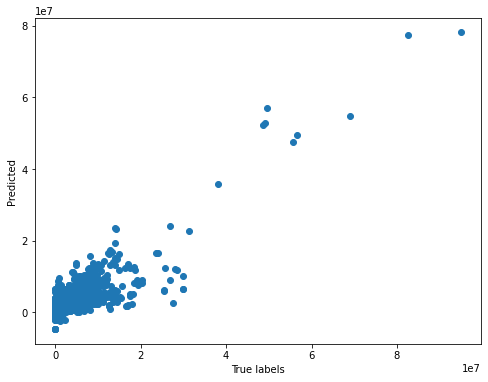

In [49]:
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(y_test.fillna(0), y_test_preds);
axes.set_xlabel("True labels")
axes.set_ylabel("Predicted")